# Домашнее задание по статистическому анализу на python

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics as stas
from sklearn import preprocessing
import seaborn as sns
import requests

Загрузить датасет по url:


In [83]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [84]:
df.head(2)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

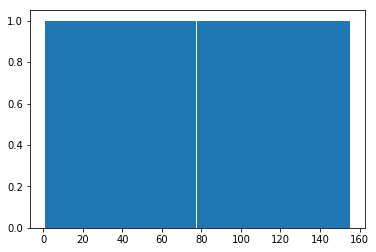

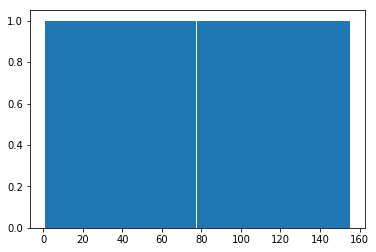

Это равномерное распределение


In [86]:
plt.hist(df['Freedom'],len(df))
plt.show()
plt.hist(df['Positive affect'],len(df))
plt.show()
print('Это равномерное распределение')

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [87]:
print('Медиана:',stas.median(df['Freedom'].dropna()),
      '\nМода:','nan, потому что равномерное распределение',
      '\nМатематическое ожидание:',stas.mean(df['Freedom'].dropna()),
      '\nСтандартное отклонение:',stas.pstdev(df['Freedom'].dropna()),
      '\nДисперсия:',stas.variance(df['Freedom'].dropna()),
      '\nМинимум:',min(df['Freedom']),
      '\nМаксимум:',max(df['Freedom']),
      '\nВыбросы:',df['Freedom'].isnull().sum(),
      '\nРазмах:',max(df['Freedom'])-min(df['Freedom']))

Медиана: 78.0 
Мода: nan, потому что равномерное распределение 
Математическое ожидание: 78.0 
Стандартное отклонение: 44.74371464239419 
Дисперсия: 2015.0 
Минимум: 1.0 
Максимум: 155.0 
Выбросы: 1 
Размах: 154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Корреляция Пирсона: 0.6817698430601656
В некоторой степени переменные коррелируют.


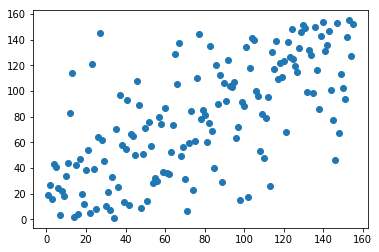

In [88]:
plt.scatter(df['Freedom'].dropna(),df['Positive affect'].dropna())
print('Корреляция Пирсона:', sts.pearsonr(df['Freedom'].dropna(),df['Positive affect'].dropna())[0])
print('В некоторой степени переменные коррелируют.')

Нормализовать данные колонки Freedom (централизация + масштабирование)

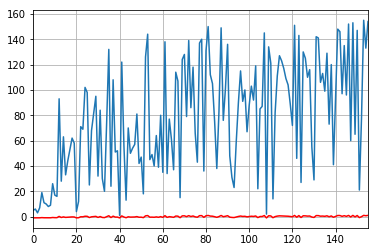

In [89]:
freedom=df['Freedom'].dropna()
freedom.plot()
plt.plot(freedom.index,preprocessing.MinMaxScaler(feature_range=(-1,1))\
.fit_transform(np.array((freedom-stas.mean(freedom))).reshape(-1, 1)),'r')
plt.grid()

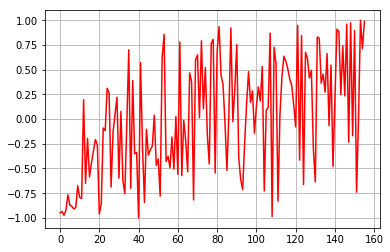

In [90]:
plt.plot(freedom.index,preprocessing.MinMaxScaler(feature_range=(-1,1))\
.fit_transform(np.array((freedom-stas.mean(freedom))).reshape(-1, 1)),'r')
plt.grid()

Построить матрицу корреляций для всех колонок таблицы

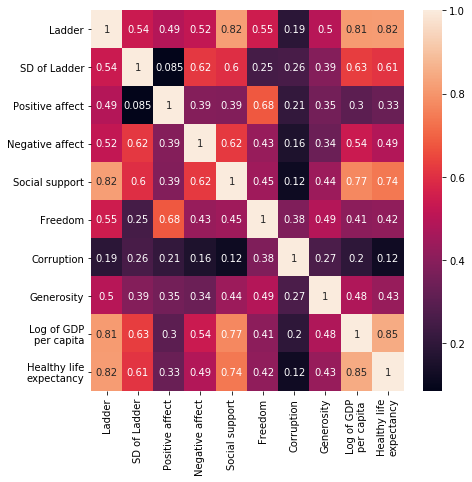

In [91]:
sns.heatmap(df.corr(),annot=True)
plt.gcf().set_size_inches(7,7)
plt.show()

Загрузить следующую таблицу: 

In [92]:
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [93]:
len(df)

18249

Сделать частотный график колонки AveragePrice. Какое это распределение?

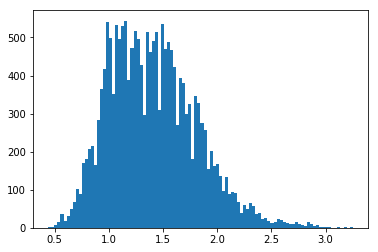

Это нормальное распределение


In [94]:
plt.hist(df['AveragePrice'],100)
plt.show()
print('Это нормальное распределение')

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [103]:
corr, p_value = sts.pearsonr(df['4046'],df['AveragePrice'])
print(corr)
print('Корреляция скорее обратная, чем она есть.')

-0.20831704848788477
Корреляция скорее обратная, чем она есть. Т.е. число покупок обратнопропорционально (в малой степени) цене.
